[View in Colaboratory](https://colab.research.google.com/github/friberger/kodamat/blob/master/marie_leker_med_maten.ipynb)

In [1]:
%matplotlib inline

from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity
import numpy as np
import sqlite3
import math
import requests
import pickle

import matplotlib
import matplotlib.pyplot as plt

Syftet med den här är att mäta avståndet mellan huvudgruppernas medelpunkter.

In [2]:
url = 'http://infontology.org/dev/db.npy' #Picklad fil som innehåller hela Livsmedelsdatabasen

r = requests.get(url, allow_redirects = True)
db_contents = pickle.loads(r.content)

In [3]:
columns = np.array([ 2,  4,  5,  6])
# Possible columns: [ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57]
# Kolumner som inte predicerar så mycket: [22, 24, 29, 30, 31, 41, 45]

In [16]:
name = input()

Kokosfett


In [17]:
x = np.where(db_contents == name)
x

(array([3]), array([0]))

In [18]:
db_contents [x[0]]

array([['Kokosfett', '4', 884.3, 3700.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, '', 92.0, 13.0, 46.3, 18.7, 9.6, 3.0,
        0.0, 6.0, 0.0, 7.2, 2.0, 1.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '',
        0.0, 0.0, 0.0, 11.0, '', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, '', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0', 0.0, 19.0,
        'Övrigt fett (ister, talg, kokosfett)', 86, None]], dtype=object)

In [26]:
fat = db_contents [1:100,5]

In [71]:
fetthalt = input()

40


In [74]:
highfat = np.where(fat > float (fetthalt))

In [75]:
db_contents[highfat][:,0]

array(['Talg nöt', 'Späck gris', 'Ister gris', 'Kokosfett',
       'Matfettsblandning havssaltat fett 80% berikad typ Bregott',
       'Matfettsblandning fett 60 % berikad typ Bregott mellan',
       'Bordsmargarin fett 70% berikad typ Milda',
       'Bordsmargarin extrasaltat fett 60% berikad typ Milda',
       'Bordsmargarin mjölkfri fett 60% berikad typ Milda',
       'Flytande margarin fett 82 % berikad typ Milda culinesse',
       'Hushållsmargarin fett 80% berikad typ Melba',
       'Lättmargarin fett 40% berikad typ Lätt & lagom',
       'Majonnäs fett 90%', 'Sesamsås grädde', 'Gravlaxsås hovmästarsås',
       'Gravlaxsås', 'Remouladsås',
       'Matfettsblandning fett 40 % berikad typ Lätt & lagom omega 3',
       'Smör fett 80 %', 'Smör extrasaltat fett 80%',
       'Smör osaltat fett 80%', 'Druvkärnolja', 'Majsolja', 'Olivolja',
       'Tistelolja', 'Sesamolja', 'Sojaolja', 'Solrosolja',
       'Dressing fett ca 25%', 'Dressing majonnäs fett ca 25%',
       'Dressing fett 0%'

In [76]:
highfatlist = db_contents[highfat][:,60]

In [97]:
unique, counts = np.unique(highfatlist, return_counts=True)
unique
#dict(zip(unique, counts))

array(['Flytande matfettsblandning', 'Färskost o kvarg',
       'Hård matfettsblandning', 'Majonnässallad röror', 'Olja',
       'Sallad blandad mat', 'Smör', 'Sås dressing majonnäs',
       'Övrigt fett (ister, talg, kokosfett)'], dtype=object)

([<matplotlib.axis.XTick at 0x7fbbc995a5c0>,
 <a list of 9 Text xticklabel objects>)

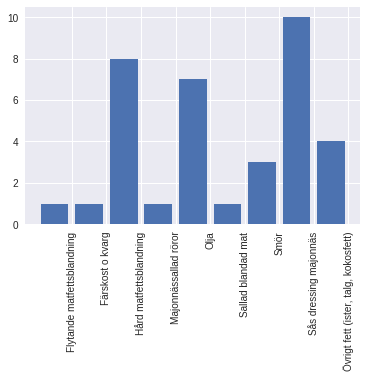

In [99]:
x = np.arange(len(unique))
plt.bar (x, height = counts)
plt.xticks(x+.5, unique, rotation='vertical')

In [61]:
set()

{'Flytande matfettsblandning',
 'Hård matfettsblandning',
 'Olja',
 'Sallad blandad mat',
 'Smör',
 'Sås dressing majonnäs',
 'Övrigt fett (ister, talg, kokosfett)'}

(array([1424.,  343.,  154.,   68.,   29.,   11.,   12.,    7.,   24.,
          16.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

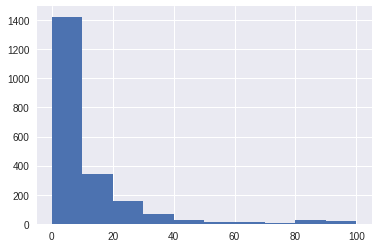

In [92]:
plt.hist([x])
#plt.show()

In [0]:
#Skapa dataset som alla rader och de kolumner som valts i columns
dataset = db_contents[:,columns].astype(float)

main_groups = np.array(list(set(db_contents[:,60]))).reshape(-1, 1) 

#Skapa hela matrisen med kolumner för alla medelvärden
main_groups=np.hstack((main_groups,np.empty([len(main_groups),len(columns)])))
print(main_groups[:,0])

['' 'Nötter frön' 'Starksprit' 'Deg och gräddade skal och bottnar' 'Svamp'
 'Färskost o kvarg' 'Baljväxter (bönor, linser och ärter)'
 'Köttprodukter kötträtter' 'Kryddor' 'Vin' 'Dryck' 'Pasta'
 'Saft läsk cider u alkohol' 'Smaksatt fil yoghurt' 'Sockerfritt godis'
 'Skaldjur bläckfisk färsk fryst kokt' 'Soja-  veteprotein o quorn'
 'Fisk o skaldjursprodukter o rätter' 'Korvrätter' 'Vatten mineralvatten'
 'Mesvaror' 'Buljong' 'Skaldjur bläckfisk konserverad'
 'Senap ketchup HP-sås soja *smaksättare*'
 'Övrigt animaliskt *kött*, grodlår, sniglar, säl - färskt, fryst, tillagat'
 'Rotfrukter' 'Sötningsmedel' 'Fruktjuice mm'
 'Sylt marmelad gelé äppelmos o dyl' 'Fisk rökt'
 'Inälvor organ produkter o rätter' 'Kaffe' 'Matgryn' 'Likör'
 'Cider alkoläsk drink' 'Godis som innehåller choklad' 'Salt' 'Dessertost'
 'Osträtter' 'Fisk färsk fryst kokt' 'Sportdrycker energidrycker'
 'Vegetabiliska produkter och mjölkersättning' 'Efterrätter'
 'Kött färskt fryst tillagat' 'Godis ej choklad' 'Gröt' 'Ä

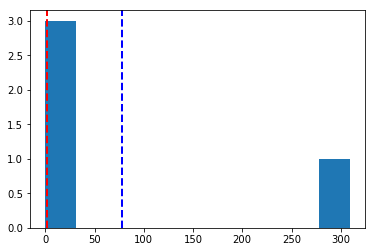

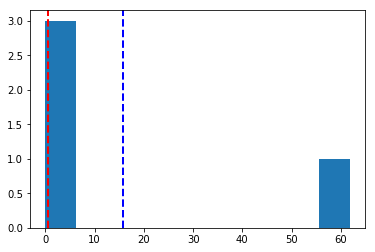

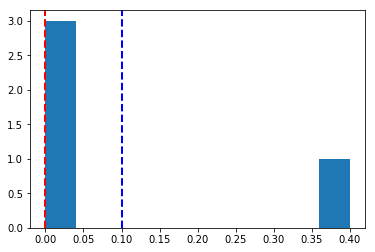

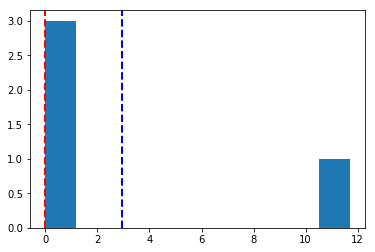

In [0]:
m_group = 'Te'
for column in range(len(columns)):
    group_members = np.where(db_contents[:,60]==m_group)
    a = dataset[group_members]
    #mean = np.mean(dataset[group_members], axis=0)
    plt.axvline(a[:,column].mean(), color='b', linestyle='dashed', linewidth=2)
    plt.axvline(np.median(a[:,column]), color='r', linestyle='dashed', linewidth=2)
    plt.hist(a[:,column])
    plt.show()

In [0]:
# Fyll matrisen main_groups med medelvärdena i alla kolumner
for row in main_groups:
    group_members = np.where(db_contents[:,60]==row[0]) # group_members blir index för alla livsmedel som tillhör den aktuella huvudgruppen
    column_means=np.mean(dataset[group_members], axis=0) # blir medelvärdena kolumn för kolumn för den aktuella huvudgruppens livsmedel
    row[1:]=column_means # Sätt medelvärdena på plats i den stora matrisen som är main_groups/huvudgrupper
    print(row)

['' '216.54285714285717' '11.528571428571428' '9.6' '14.385714285714286']
['Nötter frön' '551.7047619047619' '16.388095238095236' '45.62666666666667'
 '15.94190476190476']
['Starksprit' '226.28571428571428' '4.028571428571429' '0.0' '0.0']
['Deg och gräddade skal och bottnar' '396.3' '44.796666666666674'
 '20.833333333333332' '6.596666666666667']
['Svamp' '26.855555555555554' '2.1433333333333335' '0.4766666666666667'
 '2.2588888888888885']
['Färskost o kvarg' '189.48' '2.9066666666666667' '14.814' '11.402']
['Baljväxter (bönor, linser och ärter)' '130.35098039215683'
 '15.542549019607845' '1.76' '9.466666666666669']
['Köttprodukter kötträtter' '153.03749999999997' '5.576125' '9.1675'
 '11.73325']
['Kryddor' '372.6' '72.6' '3.55' '5.63']
['Vin' '92.76000000000002' '7.12' '0.0' '0.01']
['Dryck' '26.1' '3.5' '1.3' '0.0']
['Pasta' '225.41904761904763' '45.50761904761905' '1.3538095238095242'
 '5.967142857142856']
['Saft läsk cider u alkohol' '75.8736842105263' '18.610526315789468' '0.0'
 '

In [0]:
main_groups

array([['', '216.54285714285717', '11.528571428571428', '9.6',
        '14.385714285714286'],
       ['Nötter frön', '551.7047619047619', '16.388095238095236',
        '45.62666666666667', '15.94190476190476'],
       ['Starksprit', '226.28571428571428', '4.028571428571429', '0.0',
        '0.0'],
       ['Deg och gräddade skal och bottnar', '396.3', '44.796666666666674',
        '20.833333333333332', '6.596666666666667'],
       ['Svamp', '26.855555555555554', '2.1433333333333335',
        '0.4766666666666667', '2.2588888888888885'],
       ['Färskost o kvarg', '189.48', '2.9066666666666667', '14.814',
        '11.402'],
       ['Baljväxter (bönor, linser och ärter)', '130.35098039215683',
        '15.542549019607845', '1.76', '9.466666666666669'],
       ['Köttprodukter kötträtter', '153.03749999999997', '5.576125',
        '9.1675', '11.73325'],
       ['Kryddor', '372.6', '72.6', '3.55', '5.63'],
       ['Vin', '92.76000000000002', '7.12', '0.0', '0.01'],
       ['Dryck', '26.1', '

De här diagrammen visar hur mycket medelvärdena varierar för de olika huvudgrupperna. 

Varje diagram visar ett näringsvärde, och hur de olika huvudgrupperna fördelar sig.

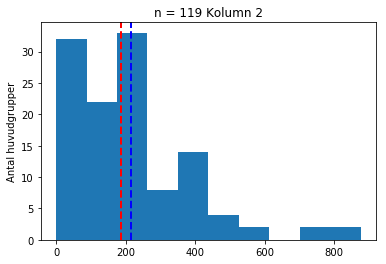

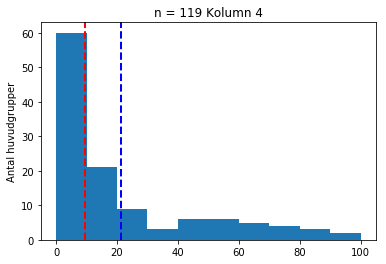

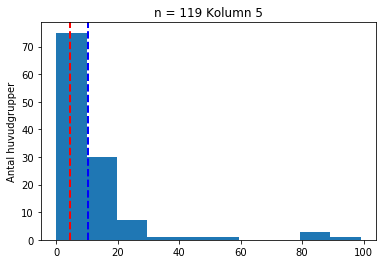

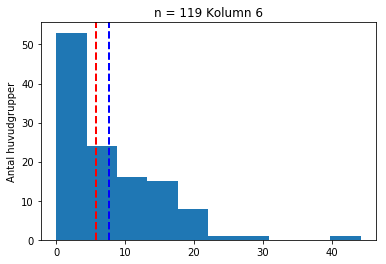

In [0]:
for i, column in enumerate(main_groups.T[1:]):
    column = np.array(column, dtype=float)
    #print (column)
    #group_members = np.where(db_contents[:,60]==m_group)
    #a = dataset[group_members]
    #mean = np.mean(dataset[group_members], axis=0)
    plt.axvline(column.mean(), color='b', linestyle='dashed', linewidth=2)
    plt.axvline(np.median(column), color='r', linestyle='dashed', linewidth=2)
    plt.hist(column)
    plt.title('n = ' + str(len(column)) + ' Kolumn ' + str(columns[i]))
    plt.ylabel('Antal huvudgrupper')
    plt.show()

In [0]:
threshold = 0.9999

In [0]:
cos_sim = cosine_similarity(main_groups[:,1:], Y=None)

In [0]:
cos_sim

array([[ 1.        ,  0.99829763,  0.99621059, ...,  0.99989291,
         0.99881641,  0.99958912],
       [ 0.99829763,  1.        ,  0.99611759, ...,  0.9979284 ,
         0.99977921,  0.9968025 ],
       [ 0.99621059,  0.99611759,  1.        , ...,  0.99488615,
         0.99566545,  0.99445136],
       ..., 
       [ 0.99989291,  0.9979284 ,  0.99488615, ...,  1.        ,
         0.99866761,  0.99961837],
       [ 0.99881641,  0.99977921,  0.99566545, ...,  0.99866761,
         1.        ,  0.99734418],
       [ 0.99958912,  0.9968025 ,  0.99445136, ...,  0.99961837,
         0.99734418,  1.        ]])

In [0]:
similars = np.where(cos_sim[4]>threshold)

In [0]:
main_groups[similars][:,0]

array(['Svamp'],
      dtype='<U73')

In [0]:
# Från https://github.com/oliviaguest/gini/blob/master/gini.py 
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))



Jag har jämför med https://stackoverflow.com/questions/39512260/calculating-gini-coefficient-in-python-numpy och de verkar ge ungefär samma resultat.

In [0]:
main_groups = np.array(list(set(db_contents.T[60]))).reshape(-1, 1)

In [0]:
main_groups

array([[''],
       ['Nötter frön'],
       ['Starksprit'],
       ['Deg och gräddade skal och bottnar'],
       ['Svamp'],
       ['Färskost o kvarg'],
       ['Baljväxter (bönor, linser och ärter)'],
       ['Köttprodukter kötträtter'],
       ['Kryddor'],
       ['Vin'],
       ['Dryck'],
       ['Pasta'],
       ['Saft läsk cider u alkohol'],
       ['Smaksatt fil yoghurt'],
       ['Sockerfritt godis'],
       ['Skaldjur bläckfisk färsk fryst kokt'],
       ['Soja-  veteprotein o quorn'],
       ['Fisk o skaldjursprodukter o rätter'],
       ['Korvrätter'],
       ['Vatten mineralvatten'],
       ['Mesvaror'],
       ['Buljong'],
       ['Skaldjur bläckfisk konserverad'],
       ['Senap ketchup HP-sås soja *smaksättare*'],
       [ 'Övrigt animaliskt *kött*, grodlår, sniglar, säl - färskt, fryst, tillagat'],
       ['Rotfrukter'],
       ['Sötningsmedel'],
       ['Fruktjuice mm'],
       ['Sylt marmelad gelé äppelmos o dyl'],
       ['Fisk rökt'],
       ['Inälvor organ produkter

In [0]:
threshold = 0.5
for main_group in main_groups:
    group_members = np.where(db_contents[:,60]==main_group)
    a = dataset[group_members]
    if gini(a[:,0]) > threshold:
        print(main_group, len(a), gini(a[:,0]))

['Kaffe'] 5 0.776121287467
['Salt'] 4 0.749999997662
['Kost- o näringspreparat'] 8 0.572265624627
['Lightdrycker u energi'] 4 0.673809498141
['Te'] 4 0.7416985942
